In [59]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

import matplotlib.pyplot as plt

In [76]:
def plot_resultaat(Y_test, y_hat, path=None):
    fig, ax = plt.subplots(1,1,figsize=(14,4))
    ax.plot(y_hat.index, y_hat['P_pred'], 'orange', linestyle='-', zorder=1, label='P_pred')
    ax.plot(Y_test.index, Y_test['P'], zorder=0, label='P')
    plt.xlabel('Datum')
    plt.legend()
    plt.grid(True)
    ax.set_xlim(y_hat.index[0], y_hat.index[-1])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('neerslag_testset.png', dpi=100, transparent=False)
    

In [77]:
# inladen model
model = tf.keras.models.load_model('./model')

In [78]:
# inladen features
X_test = pd.read_csv('X_test_scaled.csv', index_col=0, parse_dates=True)

# inladen target
Y_test = pd.read_csv('Y_test.csv', index_col=0, parse_dates=True)

# maak voorspelling
y_hat = pd.DataFrame(index=X_test.index, data=model.predict(X_test), columns=['P_pred'])
y_hat[y_hat['P_pred'] < 0] = 0

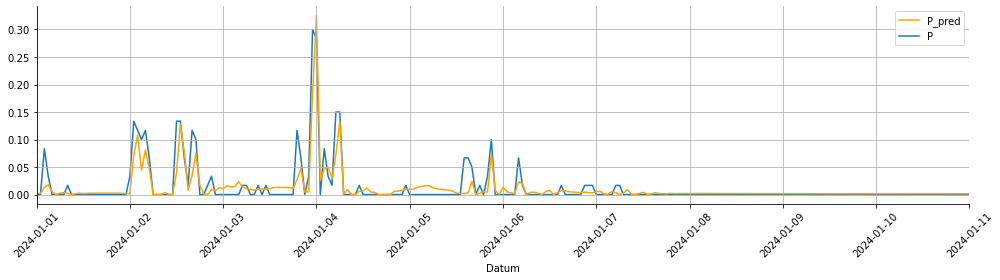

In [75]:
# plot 
plot_resultaat(Y_test, y_hat)